In [2]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='03be7449-2f42-405a-88ca-f3db005addf3', project_access_token='p-daf2d03cf33bfbe10ca5f681188e604d05380ebb')
pc = project.project_context


### Table of Contents

* [Section 1 - Introduction](#introduction)
* [Section 2 - Data](#data)
* [Section 3 - Methodology](#methodology)
* [Section 4 - Analysis](#analysis)
* [Section 5 - Results and Discussion](#resanddiscussion)
* [Section 6 - Conclusion](#conclusion)

### Section 1 <a class="anchor" id="introduction"></a>
<h2>Introduction: Business Problem</h2>

Accidents in traffic lead to associated fatalities and economic losses every year and thus is an area of primary concern from loss prevention point of view. Analysing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

Modeling accident severity prediction and improving the model are critical to the effective performance of road traffic systems for improved safety. Model involves predicting the Collision Severity.

### Section 2 <a class="anchor" id="data"></a>
<h2>Data</h2>

This project is based on kaggle datasets that contain an extended descriptions of different aspect of the accidents, and the most relevant and useful data is considered for analysis.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<h3>Importing Data<h3>

In [4]:
df_accident_data = pd.read_csv(project.get_file("Accident_Data.csv"))

In [5]:
df_accident_data.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,3518,CREA,3,MON,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,BELC,3,SAT,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,LISB,3,WED,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,BELC,3,SUN,18,10,16.0,12,70,6.0,NaN,1.0,1.0,1,3,1.0,1.0
4,12416,MIDU,3,MON,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


<h3>Basic Data Exploration</h3>

In [6]:
df_accident_data.shape

(8849, 17)

In [7]:
df_accident_data.describe()

,Collision_Ref_No,Collision_Severity,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
count,8849.000000,8849.000000,8849.000000,8849.000000,8601.000000,8849.000000,8849.000000,8593.000000,8590.000000,8573.000000,8584.000000,8849.000000,8849.000000,8575.000000,8600.000000
mean,6549.713301,2.879760,15.666968,6.648887,13.656435,12.216635,42.398576,6.394042,4.151921,1.008165,2.225186,3.237767,4.748559,1.662391,1.059767
std,3923.960064,0.361779,8.787266,3.522405,5.093198,2.720512,14.515087,5.018909,2.865900,0.119020,3.246266,2.071881,3.748682,1.468494,0.492445
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3033.000000,3.000000,8.000000,4.000000,10.000000,13.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,6073.000000,3.000000,16.000000,7.000000,14.000000,13.000000,30.000000,6.000000,4.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000
75%,10072.000000,3.000000,23.000000,10.000000,17.000000,13.000000,60.000000,12.000000,7.000000,1.000000,1.000000,5.000000,9.000000,2.000000,1.000000
max,13147.000000,3.000000,31.000000,12.000000,23.000000,14.000000,70.000000,12.000000,7.000000,3.000000,12.000000,7.000000,10.000000,10.000000,6.000000


In [8]:
df_accident_data['Collision_Severity'].value_counts()
#Severity {1,2,3}: 
# 1:Fatal injury collision, 2:Serious injury collision, 3:Slight injury collision

3    7896
2     842
1     111
Name: Collision_Severity, dtype: int64

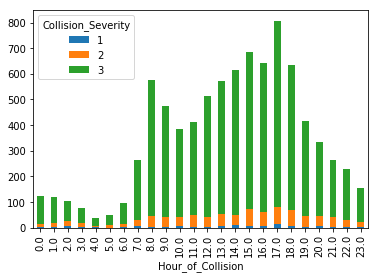

In [9]:
df_accident_data.groupby(['Hour_of_Collision', 'Collision_Severity']).size().unstack().plot(kind='bar', stacked=True)

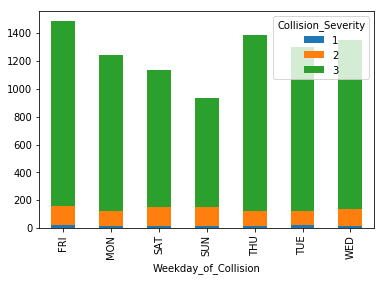

In [10]:
df_accident_data.groupby(['Weekday_of_Collision', 'Collision_Severity']).size().unstack().plot(kind='bar', stacked=True)

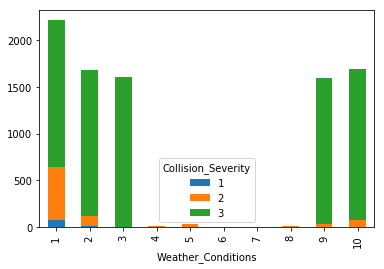

In [11]:
df_accident_data.groupby(['Weather_Conditions', 'Collision_Severity']).size().unstack().plot(kind='bar', stacked=True)
# 1 :  Fine without high winds, 2 :  Raining without high winds, 3 :  Snowing without high winds, 4 :  Fine with high winds, 5 :  Raining with high winds
# 6 :  Snowing with high winds, 7 :  Fog or mist - if hazard, 8 :  Strong sun (glaring), 9 :  Other, 10 :  Unknown

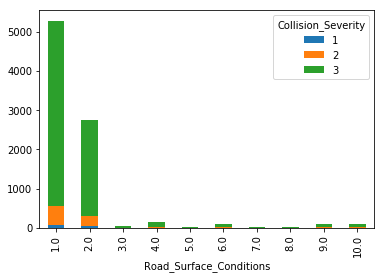

In [12]:
df_accident_data.groupby(['Road_Surface_Conditions', 'Collision_Severity']).size().unstack().plot(kind='bar', stacked=True)
# 1 :  Dry, 2 :  Wet / damp, 3 :  Snow, 4 :  Frost / ice, 5 :  Flood, 6 :  Oil, 7 :  Mud, 8 :  Leaves, 9 :  Slippery (after dry spell), 10 :  Other

### Section 3 <a class="anchor" id="methodology"></a>
<h2>Methodology</h2>

In this project we will direct our efforts on predicting the collision severity for the traffic accident. We will limit our analysis to collision severity prediction while also trying to see in parallel if any of the factors like weather or road conditions have any influence on the collision severity.

In first step we have analysed the available data to identify any influencing factors that have a bearing on the severity. Factors like hour of the day, day of the week, weather conditions like raining/snowing/fog/etc. along with road conditions like wet/snow/oil/etc. were analysed and no such stand out factor identified.

Second step in our analysis will be exploration and calculation using available data to define the model for prediction using different options, and then focus our attention on the model evaluation using test data to define the most suitable model for collision severity prediction based on the available data set.

### Section 4 <a class="anchor" id="analysis"></a>
<h2>Analysis</h2>

Derive collision severity prediction based on the available data set using different modeling techniques. Test data set is used to evaluate the score for the different modeling techniques.

In [13]:
from sklearn import (svm, preprocessing)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (recall_score, precision_score, accuracy_score, confusion_matrix,)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [14]:
data_train = pd.read_csv(project.get_file("Accident_Data.csv"))
data_test = pd.read_csv(project.get_file("Accident_TestData.csv"))

In [15]:
le = LabelEncoder()
le.fit(data_train['Weekday_of_Collision'])
data_train['Weekday_of_Collision'] = le.transform(data_train['Weekday_of_Collision'])
le.fit(data_train['Policing_Area'].astype(str))
data_train['Policing_Area'] = le.transform(data_train['Policing_Area'].astype(str))
data_train = data_train.fillna(data_train.median())

In [16]:
le.fit(data_test['Collision_Severity'])
data_test['Collision_Severity'] = le.transform(data_test['Collision_Severity'])
le.fit(data_test['Weekday_of_Collision'])
data_test['Weekday_of_Collision'] = le.transform(data_test['Weekday_of_Collision'])
le.fit(data_test['Policing_Area'].astype(str))
data_test['Policing_Area'] = le.transform(data_test['Policing_Area'].astype(str))
data_test = data_test.fillna(data_test.median())

In [17]:
labels_train = data_train["Collision_Severity"]
data_train_x = data_train.drop(["Collision_Severity", "Collision_Ref_No"], axis=1)
data_test_x = data_test.drop(["Collision_Severity", "Collision_Ref_No"], axis=1)
data_train_x.shape

(8849, 15)

In [18]:
import collections
from sklearn.decomposition import PCA

data_variables = train_test_split(data_train_x, labels_train, test_size = 0.25, random_state = 42)
data_train_l, data_test_l, labels_train_l, labels_test_l = data_variables

scaler = preprocessing.StandardScaler().fit(data_train_l)
train_data_scaled = scaler.transform(data_train_l)
test_data_scaled = scaler.transform(data_test_l)
test_data_scaled_x = scaler.transform(data_test_x)

In [19]:
#XGBClassifier
classifier = XGBClassifier()
classifier.fit(train_data_scaled, labels_train_l)

classifier.fit(train_data_scaled, labels_train_l)
predict_y = classifier.predict(test_data_scaled)

a = np.array(predict_y)
print(collections.Counter(a))

accuracy = classifier.score(test_data_scaled, labels_test_l)

precision = precision_score(labels_test_l, predict_y, average='micro')
recall = recall_score(labels_test_l, predict_y, average='micro')

cmatrix = confusion_matrix(labels_test_l, predict_y)
print("accuracy  : {}".format(accuracy))
print("accuracy[round]  : {}".format(round(accuracy, 3)))
print("precision : {}".format(precision))
print("recall    : {} \n".format(recall))
print("Confusion matrix \n{}\n\n".format(cmatrix))

Counter({3: 2166, 2: 46, 1: 1})
accuracy  : 0.9042024401265251
accuracy[round]  : 0.904
precision : 0.9042024401265251
recall    : 0.9042024401265251 

Confusion matrix 
[[   0    7   20]
 [   1   30  175]
 [   0    9 1971]]




In [20]:
#SVC
svc = SVC()
svc.fit(train_data_scaled, labels_train_l)
Y_pred = svc.predict(test_data_scaled)
a = np.array(Y_pred)
predict_svc = collections.Counter(a)
acc_svc = round(svc.score(test_data_scaled, labels_test_l) * 100, 2)
acc_svc

89.47

In [21]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_data_scaled, labels_train_l)
Y_pred = knn.predict(test_data_scaled)
a = np.array(Y_pred)
predict_knn = collections.Counter(a)
acc_knn = round(knn.score(test_data_scaled, labels_test_l) * 100, 2)
acc_knn

86.99

In [22]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(train_data_scaled, labels_train_l)
Y_pred = logreg.predict(test_data_scaled)
a = np.array(Y_pred)
predict_log = collections.Counter(a)
acc_log = round(logreg.score(test_data_scaled, labels_test_l) * 100, 2)
acc_log

89.47

In [23]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(train_data_scaled, labels_train_l)
Y_pred = gaussian.predict(test_data_scaled)
a = np.array(Y_pred)
predict_gaussian = collections.Counter(a)
acc_gaussian = round(gaussian.score(test_data_scaled, labels_test_l) * 100, 2)
acc_gaussian

9.81

In [24]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(train_data_scaled, labels_train_l)
Y_pred = perceptron.predict(test_data_scaled)
a = np.array(Y_pred)
predict_perceptron = collections.Counter(a)
acc_perceptron = round(perceptron.score(test_data_scaled, labels_test_l) * 100, 2)
acc_perceptron

79.8

In [25]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(train_data_scaled, labels_train_l)
Y_pred = linear_svc.predict(test_data_scaled)
a = np.array(Y_pred)
predict_linear_svc = collections.Counter(a)
acc_linear_svc = round(linear_svc.score(test_data_scaled, labels_test_l) * 100, 2)
acc_linear_svc

89.47

In [26]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(train_data_scaled, labels_train_l)
Y_pred = sgd.predict(test_data_scaled)
a = np.array(Y_pred)
predict_sgd = collections.Counter(a)
acc_sgd = round(sgd.score(test_data_scaled, labels_test_l) * 100, 2)
acc_sgd

89.47

In [27]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_data_scaled, labels_train_l)
Y_pred = decision_tree.predict(test_data_scaled)
a = np.array(Y_pred)
predict_decision_tree = collections.Counter(a)
acc_decision_tree = round(decision_tree.score(test_data_scaled, labels_test_l) * 100, 2)
acc_decision_tree

85.45

In [28]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data_scaled, labels_train_l)
Y_pred = random_forest.predict(test_data_scaled)
a = np.array(Y_pred)
predict_random_forest = collections.Counter(a)
acc_random_forest = round(random_forest.score(test_data_scaled, labels_test_l) * 100, 2)
acc_random_forest

89.88

In [29]:
# XG Boost
xgboost = XGBClassifier()
xgboost.fit(train_data_scaled, labels_train_l)
Y_pred = xgboost.predict(test_data_scaled)
a = np.array(Y_pred)
predict_xgboost = collections.Counter(a)
acc_xgboost = round(xgboost.score(test_data_scaled, labels_test_l) * 100, 2)
acc_xgboost

90.42

In [32]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'XG Boost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_xgboost],
    'Count': [predict_svc, predict_knn, predict_log, 
              predict_random_forest, predict_gaussian, predict_perceptron, 
              predict_sgd, predict_linear_svc, predict_decision_tree, predict_xgboost]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Count
9,XG Boost,90.42,"{3: 2166, 2: 46, 1: 1}"
3,Random Forest,89.88,"{3: 2176, 2: 35, 1: 2}"
0,Support Vector Machines,89.47,{3: 2213}
2,Logistic Regression,89.47,{3: 2213}
6,Stochastic Gradient Descent,89.47,{3: 2213}
7,Linear SVC,89.47,{3: 2213}
1,KNN,86.99,"{3: 2105, 2: 84, 1: 24}"
8,Decision Tree,85.45,"{3: 1944, 2: 231, 1: 38}"
5,Perceptron,79.80,"{3: 1891, 2: 321, 1: 1}"
4,Naive Bayes,9.81,"{1: 1982, 3: 193, 2: 38}"


### Section 5 <a class="anchor" id="resanddiscussion"></a>
<h2>Results and Discussion</h2>

Table below includes the result of the evaluation of each model

In [ ]:
| Model             | Score   | Collision Severity Count Details   |
| ----------------- | ------- | ---------------------------------- |
| XGBoost           | 90.42   | {3: 2166, 2: 46, 1: 1}             |
| ----------------- | ------- | ---------------------------------- |
| Random Forest     | 89.79   | {3: 2183, 2: 29, 1: 1}             |
| ----------------- | ------- | ---------------------------------- |
| Support Vector    |         |                                    |
|      Machines     | 89.47   | {3: 2213}                          |
| ----------------- | ------- | ---------------------------------- |
|Logistic Regression| 89.47   | {3: 2213}                          |
| ----------------- | ------- | ---------------------------------- |
| Linear SVC        | 89.47   | {3: 2213}                          |
| ----------------- | ------- | ---------------------------------- |
|Stochastic Gradient|         |                                    |
|      Descent      | 87.75   | {3: 2128, 2: 80, 1: 5}             |
| ----------------- | ------- | ---------------------------------- |
| KNN               | 86.99   | {3: 2105, 2: 84, 1: 24}            |
| ----------------- | ------- | ---------------------------------- |
| Decision Tree     | 85.18   | {3: 1945, 2: 222, 1: 46}           |
| ----------------- | ------- | ---------------------------------- |
| Perceptron        | 79.80   | {3: 1891, 2: 321, 1: 1}            |
| ----------------- | ------- | ---------------------------------- |
| Naive Bayes       |  9.81   | {1: 1982, 3: 193, 2: 38}           |
| ----------------- | ------- | ---------------------------------- |

As seen from the results table, XG Boost along with its advantage for execution speed has also given the most accurate results for the model when evaluated against the test data for predicting collision severity.

### Section 6 <a class="anchor" id="conclusion"></a>
<h2>Conclusion</h2>

Data analysis can help build useful models to predict the severity of a traffic accident. 
Accuracy of the model has room for improvement and various other factors like speed, travel time, weather conditions, road conditions, peak traffic window can be corelated and analysed for improved results. These models can then be enhanced to predict potentail accident spots and time of the day along with the collision severity, which in turn can provide Authorities insight and time to develop procedures and policies for betterment of all.